In [70]:
library(reshape2)
library(dplyr)
library(Matrix)
library(matrixStats)
library(ggplot2)
library(ggpubr)
library(patchwork)

In [2]:
#Stereo cell annotation data, download from https://db.cngb.org/stomics/mbcsta/download/
celldata <- readRDS('data/marmoset.rds')
celldata_NN <- readRDS('data/marmoset_Non_Neuron.rds')
celldata <- rbind(celldata,celldata_NN)
celldata2 <- readRDS('data/marmoset2.rds')
celldata2_NN <- readRDS('data/marmoset2_Non_Neuron.rds')
celldata2 <- rbind(celldata2,celldata2_NN)

In [33]:
celldata2$ry <- -celldata2$ry

In [72]:
#load plot function from Atlas_plot
source('R_function/Atlas_plot.R')

Coordinate system already present. Adding new coordinate system, which will
replace the existing one.


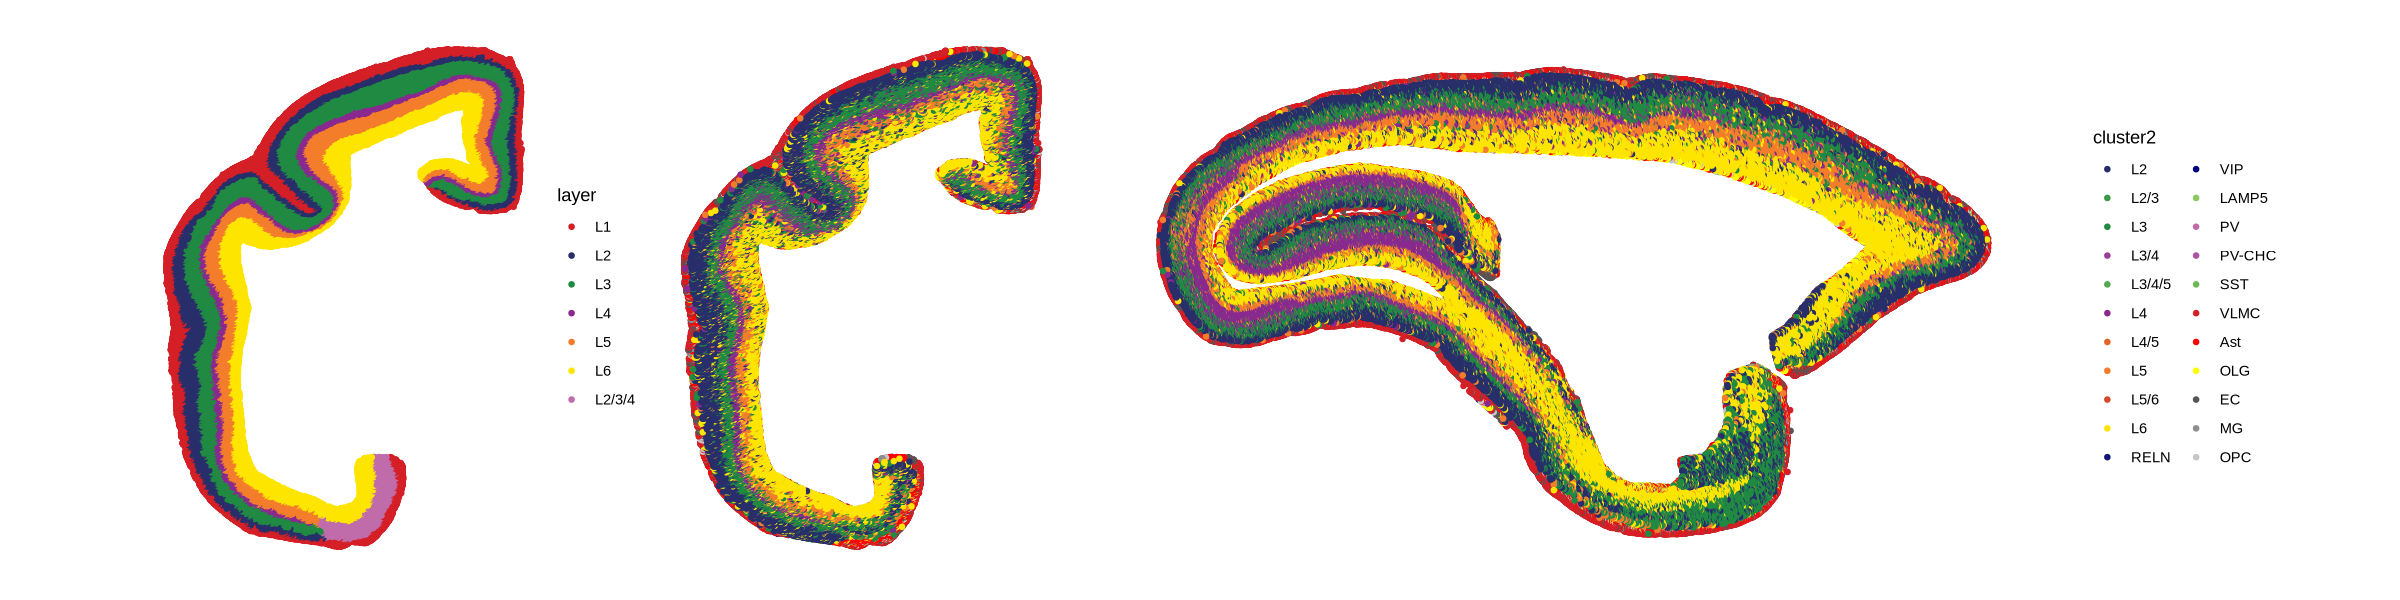

In [38]:
#Plot the layer pattern and subclass in the whole slice, similar to Figure 1B and Figure 1F.
p1 <- plot_whole(celldata,'T461','layer',show_legend = TRUE)
p2 <- plot_whole(celldata,'T461','cluster2',show_legend = FALSE)
p3 <- plot_whole(celldata2,'T550','cluster2',show_legend = TRUE,sag = TRUE)
options(repr.plot.width=20,repr.plot.height=5)
p1+p2+p3

Warning message:
“Removed 110925 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 110925 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 110925 rows containing missing values or values outside the scale range
(`geom_point()`).”


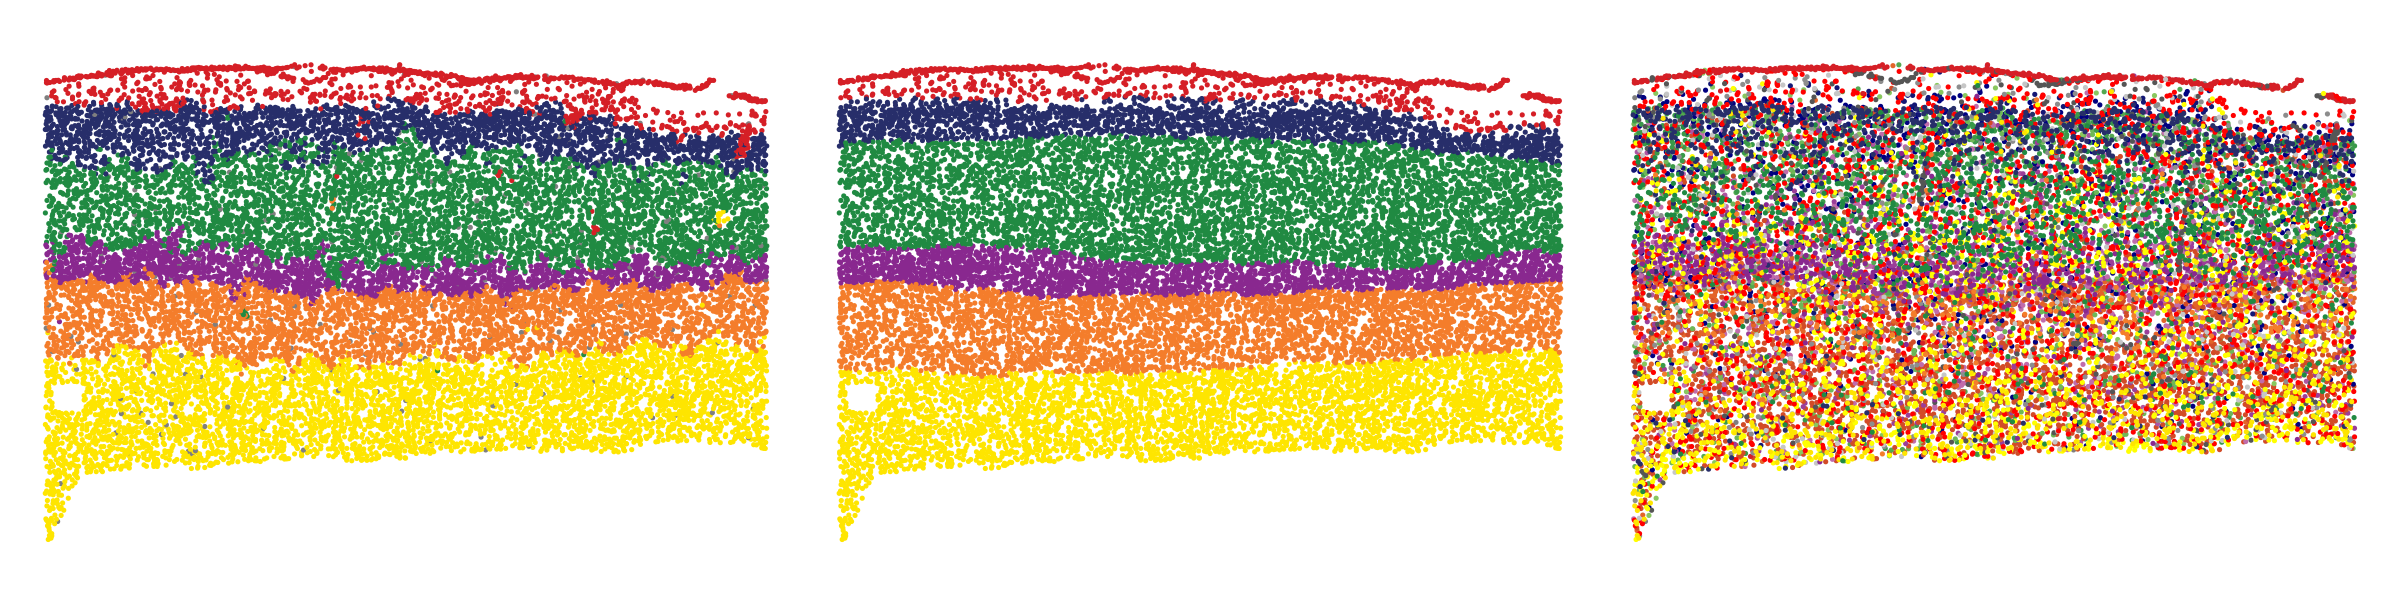

In [59]:
#Plot the panel, similar to Figure 1C,1D and 1E.
#plot panel, inpute the celldata, slice, panel mid-x, panel mid-y, panel roation angle, function(layer,unsuperbised_layer,celltype,cluster2)
p1 <- plot_panel(celldata,'T461',35400,30100,-20,'unsupervised_layer')
p2 <- plot_panel(celldata,'T461',35400,30100,-20,'layer')
p3 <- plot_panel(celldata,'T461',35400,30100,-20,'cluster2')
options(repr.plot.width=20,repr.plot.height=5)
p1+p2+p3

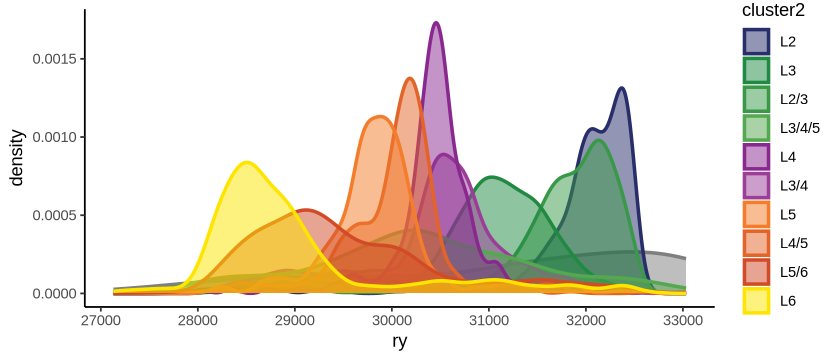

In [65]:
#Plot the Glu density, similar to Figure 1C.
tmp <- celldata[celldata$slice=='T461',]
tmp[, c("rx", "ry")] <- rotation_coor(tmp[, c("rx","ry")], -20)
tmp <- tmp[tmp$cluster1=='Glut',]
tmp <- tmp[(tmp$rx<35400+4500)&(tmp$rx>35400-4500)&(tmp$ry<30100+3000)&(tmp$ry>30100-3000),]
p1 <- ggplot()+
geom_density(data=tmp,aes(x=ry,fill=cluster2,color=cluster2),alpha=0.5,lwd=1)+
scale_color_manual(values = cell_color,breaks = names(cell_color))+
scale_fill_manual(values = cell_color,breaks = names(cell_color))+
theme_classic()
options(repr.plot.width=7,repr.plot.height=3)
p1

Warning message:
“Removed 91797 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 91797 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 89621 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 2176 rows containing missing values or values outside the scale range
(`geom_point()`).”


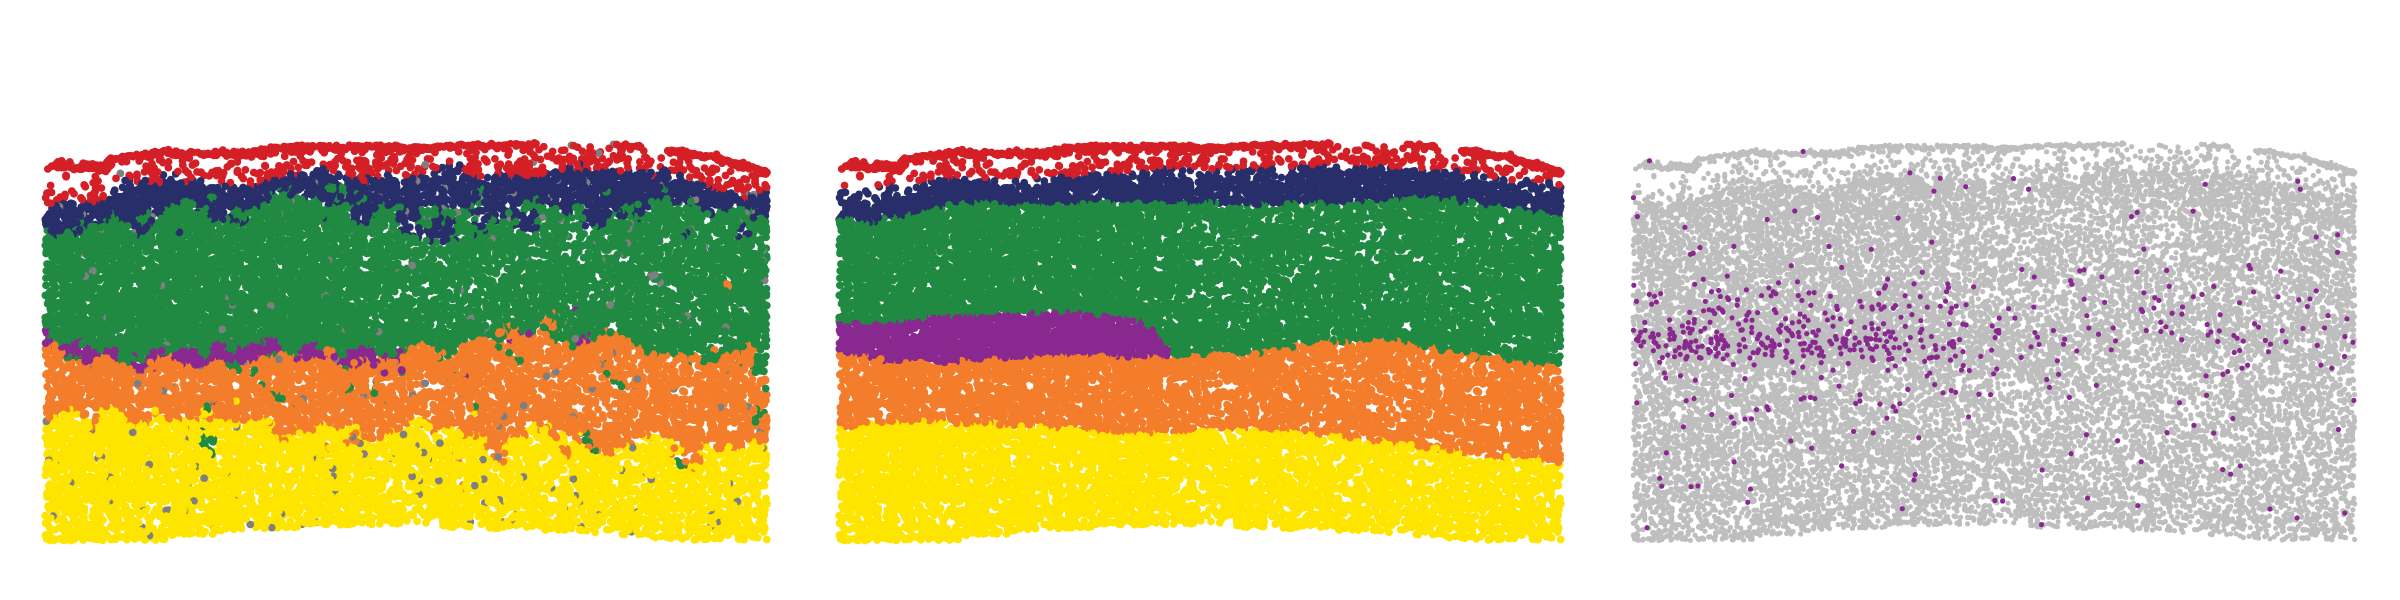

In [55]:
#Plot the panel, similar to Figure 1H.
p1 <- plot_panel(celldata,'T448',35000,25000,-30,'unsupervised_layer',dot_size = 1.5,celltype=c('L4_1','L4_2','L4_3','L4_4','L4_5'))
p2 <- plot_panel(celldata,'T448',35000,25000,-30,'layer',dot_size = 1.5,celltype=c('L4_1','L4_2','L4_3','L4_4','L4_5'))
p3 <- plot_panel(celldata,'T448',35000,25000,-30,'celltype',dot_size = 1.5,celltype=c('L4_1','L4_2','L4_3','L4_4','L4_5'),color='#89288F')
options(repr.plot.width=20,repr.plot.height=5)
p1+p2+p3

Warning message:
“Removed 134912 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 134912 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 125875 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 9037 rows containing missing values or values outside the scale range
(`geom_point()`).”


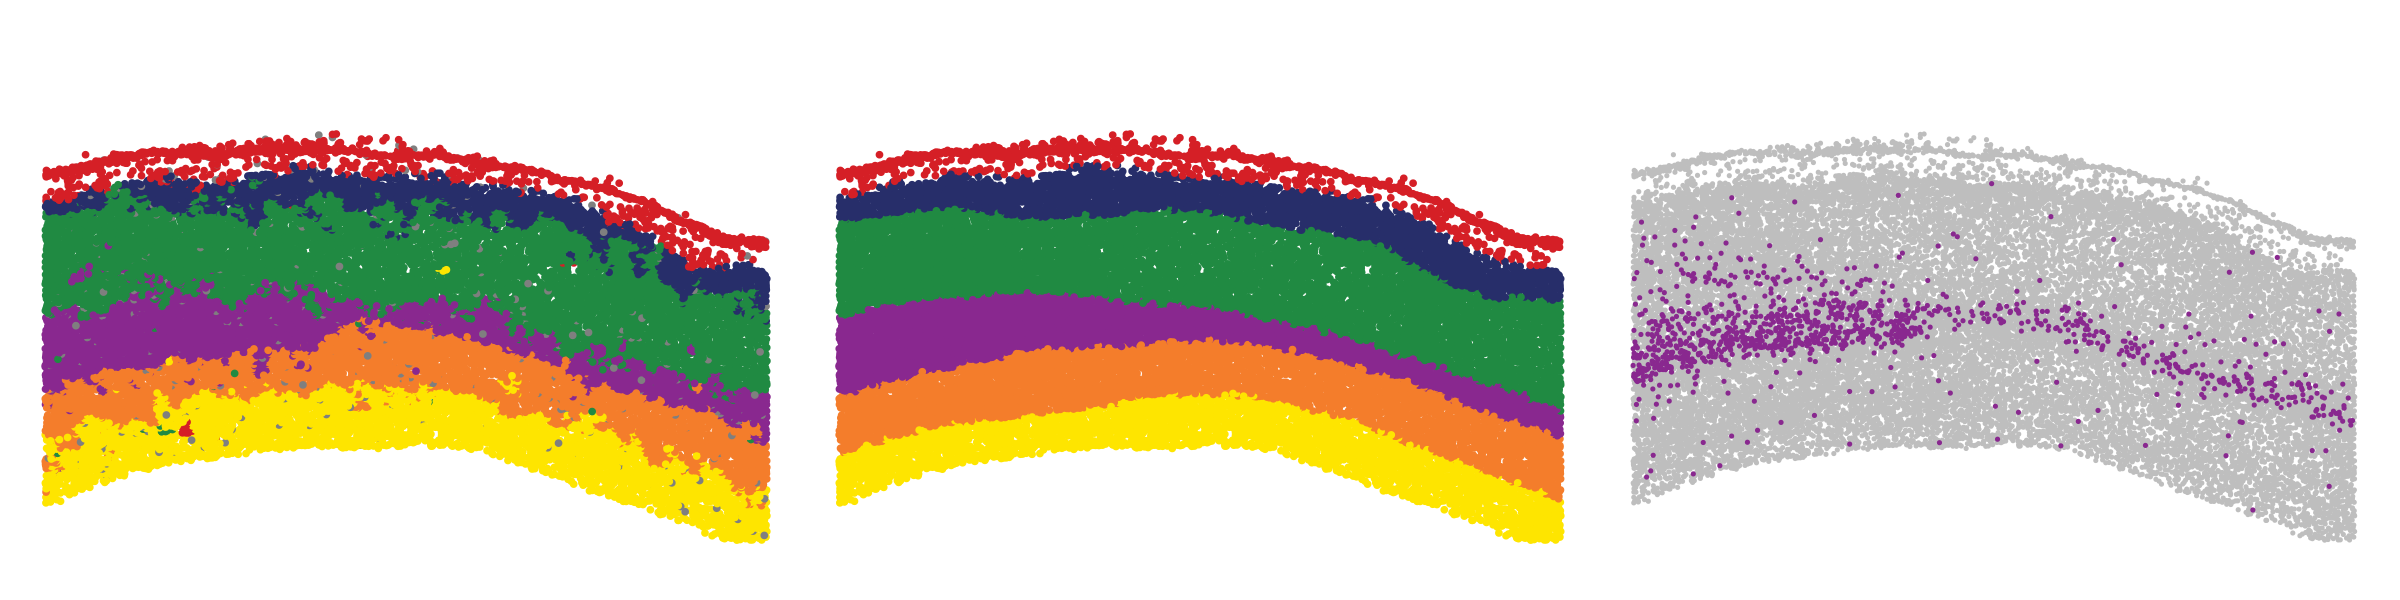

In [54]:
#Plot the panel, similar to Figure 1H.
p1 <- plot_panel(celldata,'T510',34000,11510,-50,'unsupervised_layer',dot_size = 1.5,celltype=c('L4_1','L4_2','L4_3','L4_4','L4_5'))
p2 <- plot_panel(celldata,'T510',34000,11510,-50,'layer',dot_size = 1.5,celltype=c('L4_1','L4_2','L4_3','L4_4','L4_5'))
p3 <- plot_panel(celldata,'T510',34000,11510,-50,'celltype',dot_size = 1.5,celltype=c('L4_1','L4_2','L4_3','L4_4','L4_5'),color='#89288F')
options(repr.plot.width=20,repr.plot.height=5)
p1+p2+p3

In [66]:
#region-layer mask, download from https://db.cngb.org/stomics/mbcsta/download/
manual_label <- read.csv('data/bin50_layer_region_manual_0613.csv.gz')

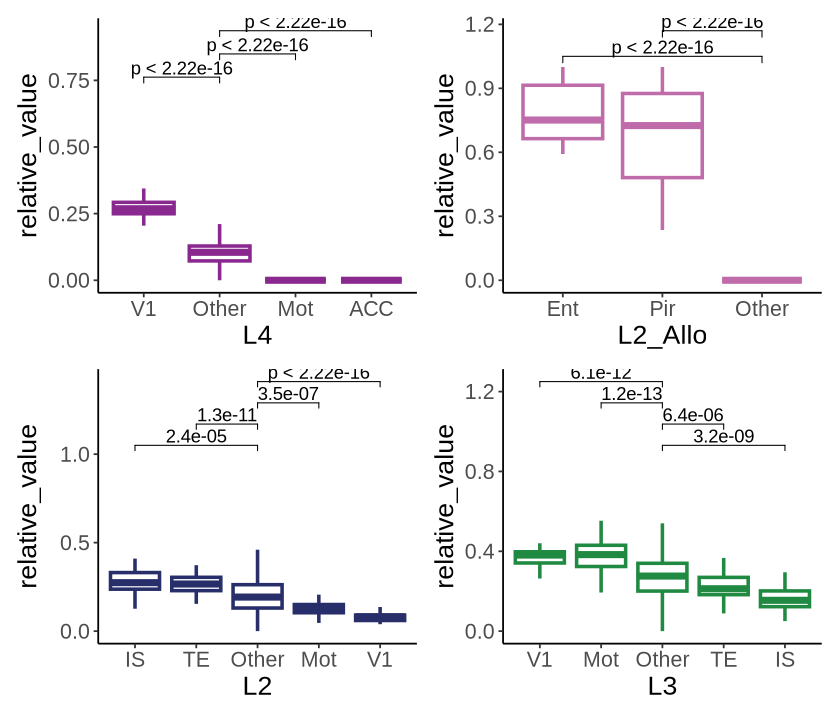

In [76]:
#Plot the boxplot, similar to Figure 1G.
options(repr.plot.width=7,repr.plot.height=6)
plot_layer_compare(manual_label)